## Facial recognition Model using SVM classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

#for advanced plot styling
import seaborn as sns; sns.set()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


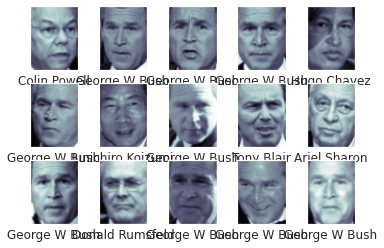

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

# Using Principle Component Analysis(PCA) for pre-processing of data

In [ ]:
from sklearn.svm import SVC

#Using randomized PCA
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

#preprocessing aNnd classifier in the same package
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)


## To adjust C and gamma for gridsearch cross_validation

In [ ]:
from sklearn.model_selection import GridSearchCV


#creating a dictionary with keys as parameters and values as different numerical values

param_grid = {'svc__C': [1, 5, 10,50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain) 
#A jupyter specific command to show the time taken for the Gridsearch 

print(grid.best_params_)




CPU times: user 1min 2s, sys: 15.8 s, total: 1min 17s
Wall time: 47.3 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

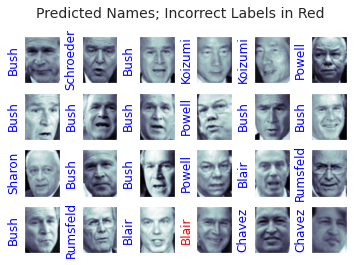

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap = 'bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='blue' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

## To get the classification report of the model

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



## To display confusion matrix between classes

Text(89.18, 0.5, 'Predicted label')

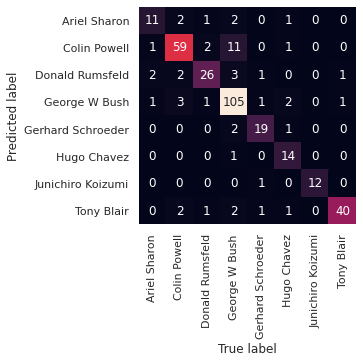

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')